<a href="https://colab.research.google.com/github/mastermindankur/quantum-101/blob/main/quantum_computing_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit-aer --quiet
!pip install qiskit-ibm-runtime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 22.9 MB/s eta 0:00:00
   ━━━

In [2]:
from qiskit import *
from qiskit_aer import Aer

In [3]:
circuit = QuantumCircuit(2,2)

In [4]:
%matplotlib inline

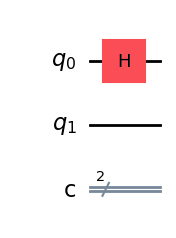

In [5]:
circuit.h(0)
circuit.draw(output='mpl')

In [6]:
circuit.cx(0,1) # appliying the CNOT gate, 0 qubit is the control bit and 1 bit is the output bit

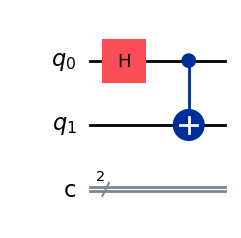

In [7]:
circuit.draw(output='mpl')

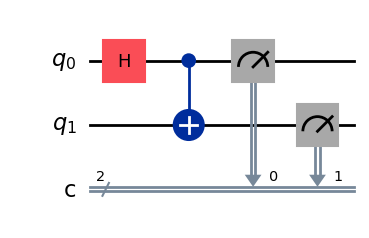

In [8]:
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [9]:
simulator= Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
transpiled_circuit = transpile(circuit, simulator)
# Execute the transpiled circuit
job = simulator.run(transpiled_circuit, shots=1024)
result = job.result()

In [10]:
from qiskit.visualization import plot_histogram

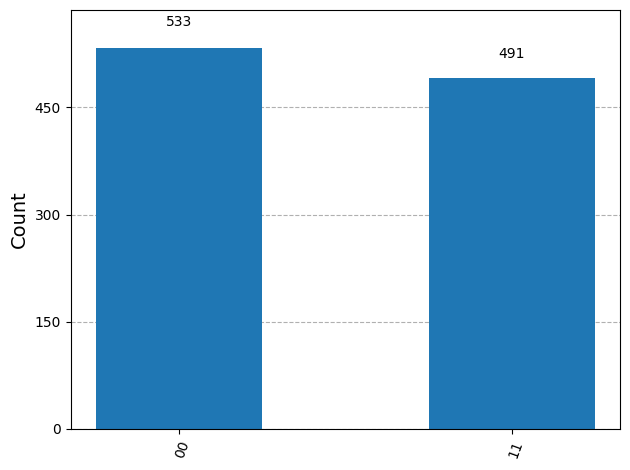

In [11]:
plot_histogram(result.get_counts(circuit))

#Simulators and Providers

In [13]:
import qiskit
import qiskit_ibm_runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

In [14]:
print("Qiskit version:", qiskit.__version__)
print("IBM Runtime version:", qiskit_ibm_runtime.__version__)

Qiskit version: 2.0.0
IBM Runtime version: 0.37.0


In [15]:
# Replace with your actual token
service = QiskitRuntimeService(channel="ibm_quantum", token="xx")

# STEP 3: List backends
for backend in service.backends():
    print(f"{backend.name}: Qubits = {backend.num_qubits}, Simulator = {backend.simulator}, Pending Jobs are {backend.status().pending_jobs}")

backend = service.backend("ibm_kyiv")

ibm_brisbane: Qubits = 127, Simulator = False, Pending Jobs are 28
ibm_kyiv: Qubits = 127, Simulator = False, Pending Jobs are 6
ibm_sherbrooke: Qubits = 127, Simulator = False, Pending Jobs are 5


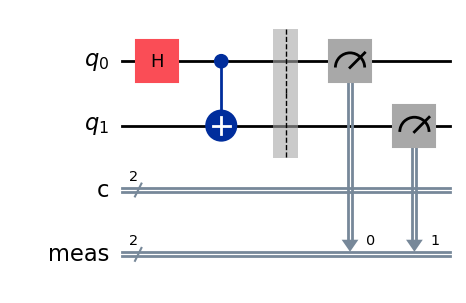

In [19]:
# 3. Build a quantum circuit
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw(output='mpl')

In [25]:
# 3. Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
# 4. Transpile circuit for the target backend
qc_transpiled = transpile(qc, backend=backend)
job = sampler.run([qc_transpiled])

print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Job ID is czrk1fxd8drg008gqxsg
Counts for the meas output register: {'01': 3, '00': 506, '11': 508, '10': 7}


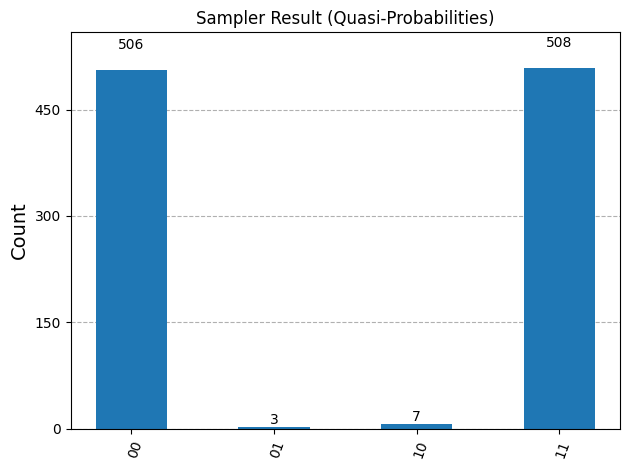

In [40]:
# Plot it
plot_histogram(pub_result.data.meas.get_counts(), title="Sampler Result (Quasi-Probabilities)")